In [1]:
import skimage
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu
import numpy as np
import os

In [2]:
path = '../data/images/img_0000015.jpg'
if os.environ.get('BATCH_RUN', False):
    path = os.environ['BATCH_RUN']

output_path = os.environ.get('BATCH_RUN_OUTPUT', '')

In [3]:
orig_img = skimage.io.imread(path)
img = orig_img

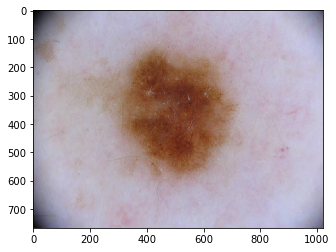

In [4]:
plt.imshow(img)

In [5]:
img = img.mean(2)

In [6]:
img.shape

(767, 1022)

In [7]:
img = img > threshold_otsu(img)

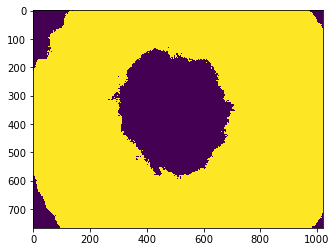

In [8]:
plt.imshow(img)

In [9]:
img = img == False

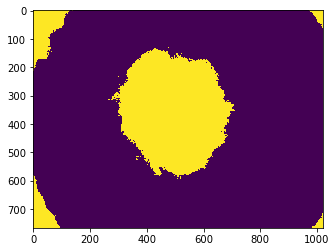

In [10]:
plt.imshow(img)

In [11]:
import scipy.ndimage.morphology

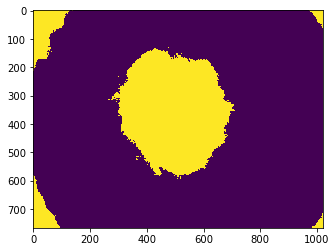

In [12]:
plt.imshow(scipy.ndimage.morphology.binary_fill_holes(img))

In [13]:
from skimage.measure import label, regionprops

In [14]:
labels = label(img)

In [15]:
center = tuple(np.array(img.shape) // 2)

In [16]:
center_patch = labels == labels[center[0], center[1]]

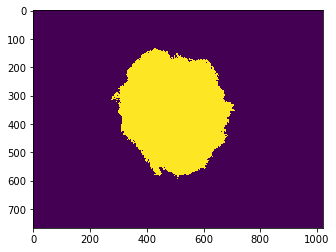

In [17]:
plt.imshow(center_patch)

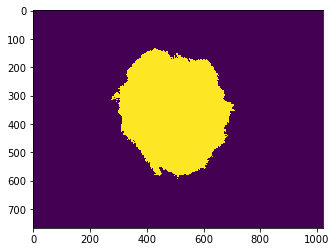

In [18]:
plt.imshow(scipy.ndimage.morphology.binary_fill_holes(center_patch))

In [19]:
removed = orig_img.copy()

In [20]:
removed[scipy.ndimage.morphology.binary_fill_holes(center_patch) == False] = 0

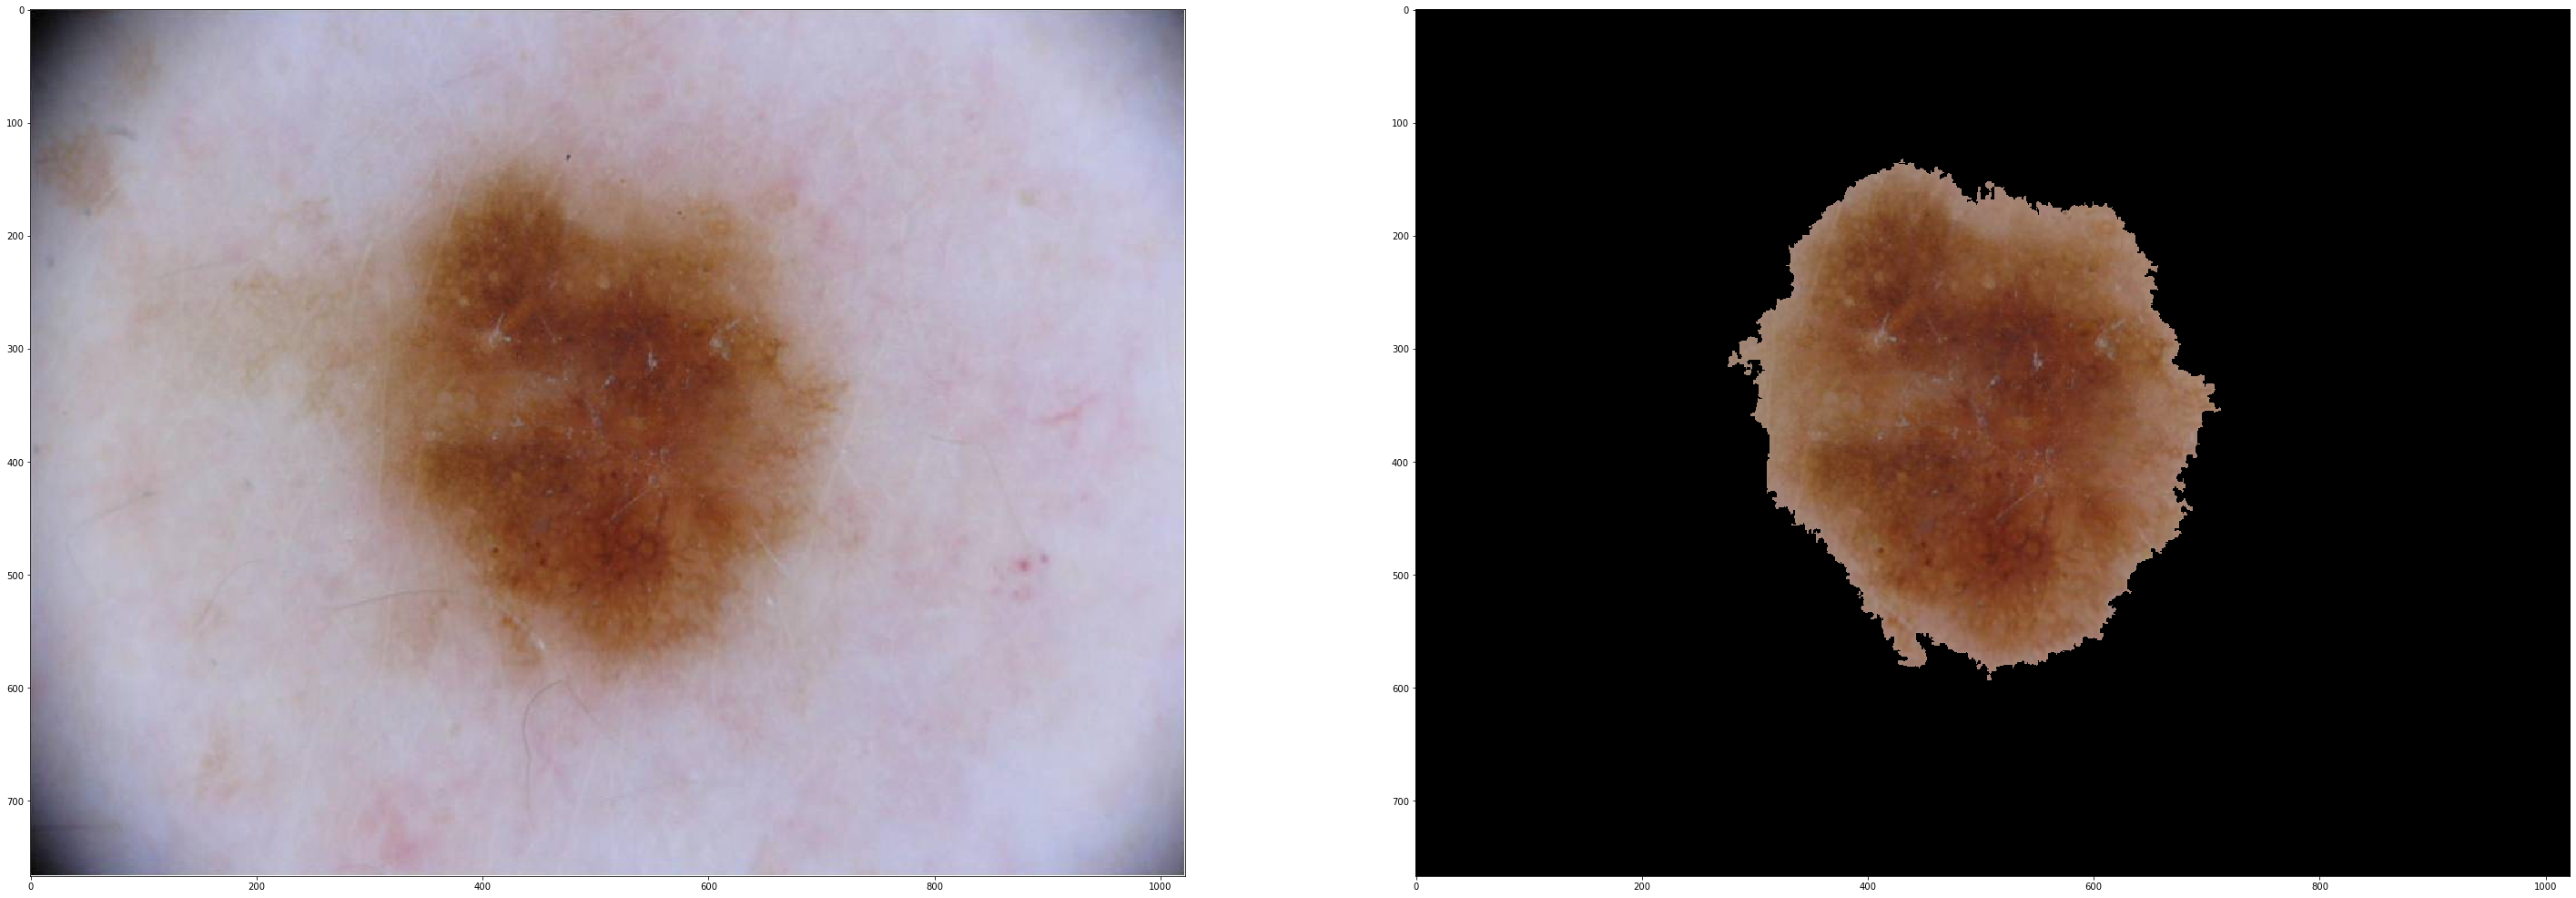

In [21]:
plt.figure(0,figsize=(50, 50))
plt.subplot(121)
plt.imshow(orig_img)
plt.subplot(122)
plt.imshow(removed)


In [22]:
if (output_path):
    height, width, _ = removed.shape
    height =  height / width * 50
    plt.figure(0, figsize=(height, 50))
    plt.clf()
    plt.subplot(221)
    plt.imshow(orig_img)
    plt.subplot(222)
    plt.imshow(removed)
    plt.subplot(223)
    plt.imshow(img)
    plt.savefig(output_path)